In [66]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# To model the Gaussian Navie Bayes classifier
from sklearn.naive_bayes import GaussianNB

import sklearn.linear_model as skl_lm
from sklearn.svm import SVC, LinearSVC

from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import preprocessing
from sklearn import neighbors

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score


import sklearn.linear_model as skl_lm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

# for plotting
%matplotlib inline

In [67]:
file = "Bank_Personal_Loan_Modelling-1.xlsx"

df = pd.read_excel(file, sheetname='Data')

In [68]:
display(df)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.600000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.500000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.000000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.700000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.000000,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.400000,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.500000,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.300000,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.600000,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.900000,3,0,1,0,0,0,0


In [69]:
df.shape

(5000, 14)

In [70]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [71]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [72]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b390d828>]], dtype=object)

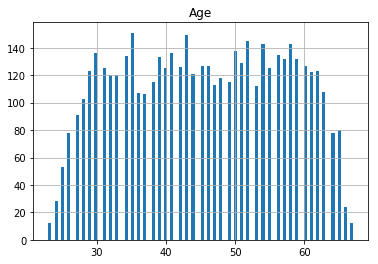

In [73]:

df.hist(column="Age",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b3821160>]], dtype=object)

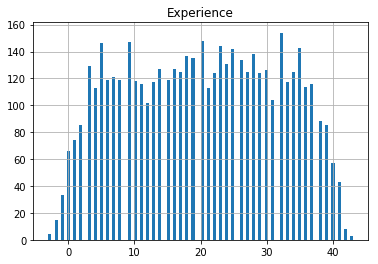

In [74]:
df.hist(column="Experience",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b3675d68>]], dtype=object)

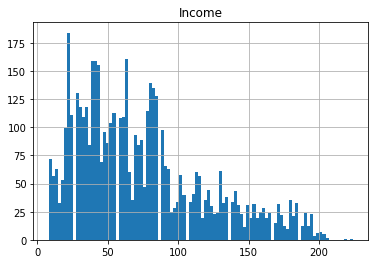

In [75]:
df.hist(column=3,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b353e550>]], dtype=object)

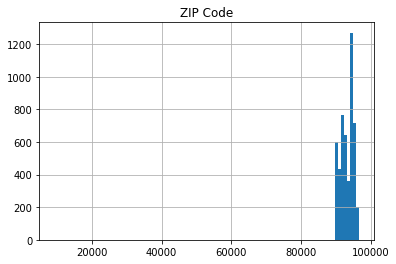

In [76]:
df.hist(column=4,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b3407320>]], dtype=object)

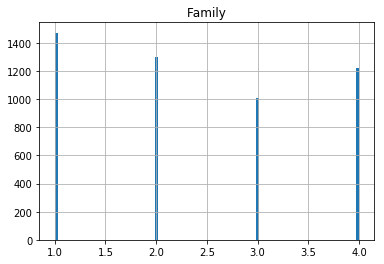

In [77]:
df.hist(column=5,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0bd4af400>]], dtype=object)

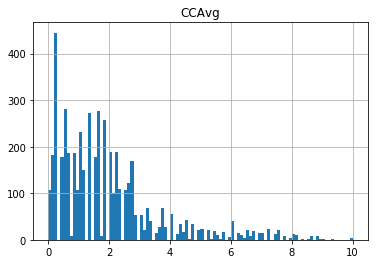

In [78]:
df.hist(column=6,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b3afa438>]], dtype=object)

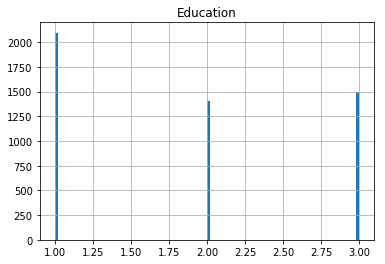

In [79]:
df.hist(column=7,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b3a242e8>]], dtype=object)

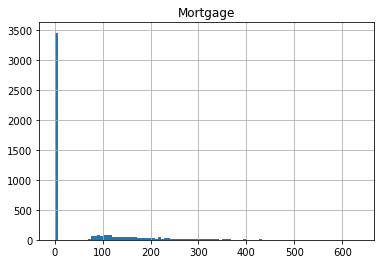

In [80]:
df.hist(column=8,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b3323eb8>]], dtype=object)

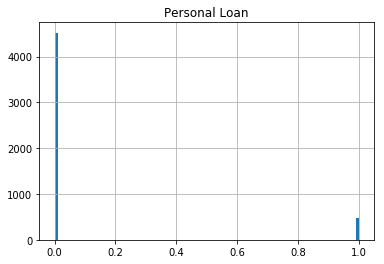

In [81]:
df.hist(column=9,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b3181240>]], dtype=object)

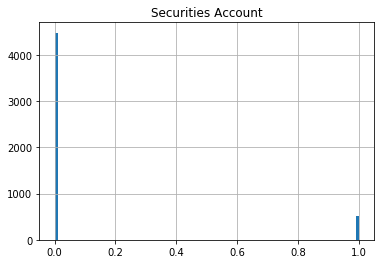

In [82]:
df.hist(column=10,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b30319b0>]], dtype=object)

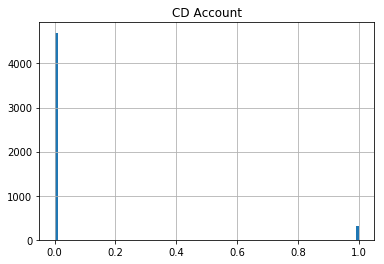

In [83]:
df.hist(column=11,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b2f00780>]], dtype=object)

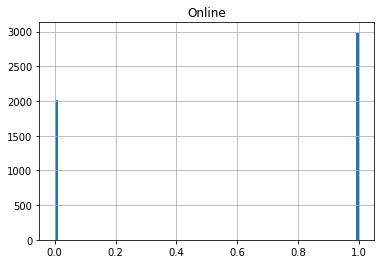

In [84]:
df.hist(column=12,bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0b2dc46a0>]], dtype=object)

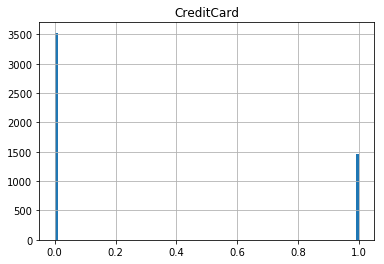

In [85]:
df.hist(column=13,bins=100)

In [86]:
df.corr()['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366891
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

In [87]:
from scipy.stats import zscore
ddf_cust = df.drop('ID',axis=1).drop('Personal Loan',axis=1).apply(zscore)

X = ddf_cust.values[:]  ## Features
Y = df['Personal Loan'].values[:]  ## Target

In [88]:
Y

array([0, 0, 0, ..., 0, 0, 0])

In [89]:
X

array([[-1.77441684, -1.66607847, -0.53822878, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.02952359, -0.09633022, -0.8641094 , ..., -0.25354028,
        -1.21661774, -0.64531434],
       [-0.55299157, -0.44516316, -1.36379301, ..., -0.25354028,
        -1.21661774, -0.64531434],
       ..., 
       [ 1.54088033,  1.64783451, -1.08136314, ..., -0.25354028,
        -1.21661774, -0.64531434],
       [ 1.71536965,  1.73504275, -0.53822878, ..., -0.25354028,
         0.82195086, -0.64531434],
       [-1.51268285, -1.40445376,  0.20043396, ..., -0.25354028,
         0.82195086,  1.54963239]])

In [90]:
from sklearn.model_selection import train_test_split
# Create the training and test data set in the ratio of 70:30 respectively. Can be any other ratio...
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 10)

In [92]:
# 1 Logistic Regresssion
lr = LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred = lr.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.95266666666666666

In [93]:
# 2 Naive Bayes
clf = GaussianNB()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.87866666666666671

In [94]:
### 3 SVM Linear Kernel
model1 = svm.SVC(kernel='linear')
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.95333333333333337

In [95]:
### 4 SVM RBF Kernel
model1 = svm.SVC(kernel='rbf')
model1.fit(X_train, Y_train)
Y_pred = model1.predict(X_test)
accuracy_score(Y_test, Y_pred)

0.97466666666666668